                                       
<table align="left" width=100%>
    <tr>
        <td width="10%">
            <img src="title.png">
        </td>
        <td>
            <div align="left">
                <font color="#21618C" size=6px>
                  <b>Smart Factory Energy Prediction Challenge
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Problem Overview

The goal is to develop a machine learning model to accurately predict the energy consumption of industrial equipment 
(equipment_energy_consumption) based on sensor data from a manufacturing facility. 
This will help optimize operations for energy efficiency and cost reduction.


## Objectives

Analyze sensor data to identify patterns and relationships.
Build a robust regression model.
Evaluate model performance using RMSE, MAE, and R².
Provide actionable insights and recommendations.
Determine the utility of random_variable1 and random_variable2.


## Table of Content

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data](#RD)**
4. **[Data Analysis and Preparation](#data_preparation)**
    - 4.1 - **[Understand the Dataset](#Data_Understanding)**
        - 4.1.1 - **[Data Type](#Data_Types)**
        - 4.1.2 - **[Summary Statistics](#Summary_Statistics)**
        - 4.1.3 - **[Distribution of Variables](#distribution_variables)**
        - 4.1.4 - **[Correlation](#correlation)**
        - 4.1.5 - **[Discover Outliers](#outliers)**
        - 4.1.6 - **[Missing Values](#Missing_Values)**      
    - 4.2 - **[Prepare the Data](#Data_Preparation)**
        - 4.2.1 -**[Feature Engineering](#feature_engineering)**
        - 4.2.2 -**[Feature Selection](#feature_selection)**  
5. **[Model Development](#model_development)**
    - 5.1 - **[Train Test Split and Scalling](#train_test_split_scalling)**
    - 5.2 - **[Model Training and Baseline Evaluation](#model_training_and_baseline_evaluation)**
6. **[Hyperparameter Tuning(for LightGBM)](#hyperparameter_tuning_(for_lightGBM))**
7. **[Final Model Evaluation](#final_model_evaluation)**
8. **[Key Findings Insights and Recommendations](#key_findings_and_recommendations)**

<a id='import_lib'></a>
# 1. Import Libraries

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Import the required libraries and functions</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [167]:
#!pip install xgboost

In [169]:
#Import Libraries

# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# datetime is used for datetime operation.
from datetime import datetime

# suppress display of warnings
import warnings

# Scikit-learn import various functions to perform Regression.. 

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import lightgbm as lgb

# Settings
warnings.filterwarnings('ignore')


In [29]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]


# SMOTE(Synthetic Minority Oversampling Technique or SMOte is used to handle class imbalance or make the traget variable values equal)

<a id='set_options'></a>
# 2. Set Options

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Now we make necessary changes to :<br><br>
1. Display complete data frames<br>
2. To avoid the exponential number<br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)
              
# Format floats to 3 decimal places)
pd.set_option('display.float_format', lambda x: '%.3f' % x) 
              
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


<a id='RD'></a>
# 3. Read Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Read and display data to get an insight into the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
# read the excel data file 
df = pd.read_csv('C:\Document\projects\DS-Intern-Assignment-kashish\data\data.csv')


In [15]:
# display the top 5 rows of the dataframe
df.head()


# Note: To display more rows, example 10, use head(10)

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,zone7_humidity,zone8_temperature,zone8_humidity,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790,19.790,NaN,19.000,45.567,17.167,55.200,NaN,84.257,17.200,41.627,18.200,48.900,17.033,45.530,6.600,733.500,92.000,7.000,63.000,5.300,13.275,13.275
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722,19.790,44.790,19.000,45.992,17.167,55.200,6.833,84.063,17.200,NaN,18.200,48.863,17.067,45.560,6.483,733.600,92.000,6.667,59.167,5.200,18.606,18.606
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.627,19.790,44.933,35.921,45.890,NaN,55.090,6.560,83.157,17.200,41.433,18.200,48.730,17.000,45.500,6.367,733.700,92.000,6.333,55.333,5.100,28.643,28.643
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590,19.790,45.000,NaN,45.723,17.167,55.090,6.433,83.423,17.133,41.290,18.100,94.386,17.000,45.400,6.250,733.800,92.000,6.000,51.500,37.674,45.410,45.410
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530,19.790,45.000,18.890,45.530,17.200,55.090,6.367,84.893,17.200,41.230,18.100,48.590,4.477,45.400,6.133,733.900,92.000,5.667,47.667,4.900,10.084,10.084


#### Dimensions of the data

In [16]:
# 'shape' function gives the total number of rows and columns in the data
df.shape

(16857, 29)

 
# 4. Data Analysis and Preparation

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Data preparation is the process of cleaning and transforming raw data before building predictive models. <br><br>
                        Here, we analyze and prepare data to perform classification techniques:<br>
                        1. Check data types. Ensure your data types are correct. Refer data definitions to validate <br>
                        2. If data types are not as per business definition, change the data types as per requirement <br>
                        3. Study summary statistics<br>
                        4. Distribution of variables<br>
                        5. Study correlation<br>
                        6. Detect outliers<br>
                        7. Check for missing values<br><br>
                        Note: It is an art to explore data, and one needs more and more practice to gain expertise in this area
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Data_Understanding'></a>
## 4.1 Understand the Dataset

<a id='Data_Types'></a>
### 4.1.1 Data Type
The main data types in Pandas dataframes are the object, float, int64, bool, and datetime64. To understand each attribute of our data, it is always good for us to know the data type of each column.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In our dataset, we have numerical and categorical variables. The numeric variables should have data type 'int'/'float' while categorical variables should have data type 'object'.<br><br> 
                        1. Check for the data type <br>
                        2. For any incorrect data type, change the data type with the appropriate type<br>
                        3. Recheck for the data type
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Check for the data type**

In [38]:
df.dtypes

timestamp                        object
equipment_energy_consumption     object
lighting_energy                  object
zone1_temperature                object
zone1_humidity                   object
zone2_temperature                object
zone2_humidity                  float64
zone3_temperature               float64
zone3_humidity                  float64
zone4_temperature               float64
zone4_humidity                  float64
zone5_temperature               float64
zone5_humidity                  float64
zone6_temperature               float64
zone6_humidity                  float64
zone7_temperature               float64
zone7_humidity                  float64
zone8_temperature               float64
zone8_humidity                  float64
zone9_temperature               float64
zone9_humidity                  float64
outdoor_temperature             float64
atmospheric_pressure            float64
outdoor_humidity                float64
wind_speed                      float64


Initial Observations:
The dataset has 16857 rows and 29 columns.
timestamp is an object, needs conversion to datetime.
Several columns, including the target equipment_energy_consumption and other sensor readings like lighting_energy, zone1_temperature, etc., are read as object type. These likely contain numerical data mixed with non-numeric strings and need to be converted to numeric.
Many columns have missing values.
Some features show a very wide range (e.g., min/max values for humidity, temperature in some zones), suggesting potential outliers or data entry errors.
<table align="left">
    <tr>
        <td width="10%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above output, it is clear to see that the data type of variables 'timestamp' is 'object', need conversion to 'datetime'.<br><br>Several columns, including the target equipment_energy_consumption and other sensor readings like lighting_energy,   zone1_temperature, etc., are read as object type. These likely contain numerical data mixed with non-numeric strings and need to be converted to numeric. 
                        .</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**2. Change the incorrect data type.**

In [40]:
#Handle Timestamp and Basic Conversions
# Convert timestamp to datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Identify columns that are object type but should be numeric
potential_numeric_cols = [
    'equipment_energy_consumption', 'lighting_energy',
    'zone1_temperature', 'zone1_humidity', 'zone2_temperature' # As per data description, these are also numeric
]

for col in potential_numeric_cols:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f"Converted column '{col}' to numeric.")


Converted column 'equipment_energy_consumption' to numeric.
Converted column 'lighting_energy' to numeric.
Converted column 'zone1_temperature' to numeric.
Converted column 'zone1_humidity' to numeric.
Converted column 'zone2_temperature' to numeric.


**3. Recheck the data type after the conversion.**

In [41]:
# recheck the data types of all variables
df.dtypes

timestamp                       datetime64[ns]
equipment_energy_consumption           float64
lighting_energy                        float64
zone1_temperature                      float64
zone1_humidity                         float64
zone2_temperature                      float64
zone2_humidity                         float64
zone3_temperature                      float64
zone3_humidity                         float64
zone4_temperature                      float64
zone4_humidity                         float64
zone5_temperature                      float64
zone5_humidity                         float64
zone6_temperature                      float64
zone6_humidity                         float64
zone7_temperature                      float64
zone7_humidity                         float64
zone8_temperature                      float64
zone8_humidity                         float64
zone9_temperature                      float64
zone9_humidity                         float64
outdoor_tempe

<table align="left">
    <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Now we have all the variables with corrected data type as required.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>For convenience, we shall split the target variable from the data frame.
Let dataframe 'df_target' be the dataframe containing the dependent variable and dataframe 'df_features' be the set of all independent variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
#target Variable Analysis: equipment_energy_consumption
# Drop rows where the target variable is NaN, as these cannot be used for training or evaluation.
# splitting features and the target variable
# consider all the columns except 'target' using 'iloc'
print(f"Rows before dropping NaNs in target: {len(df)}")
df.dropna(subset=['equipment_energy_consumption'], inplace=True)
print(f"Rows after dropping NaNs in target: {len(df)}")
df.reset_index(drop=True, inplace=True)



Rows before dropping NaNs in target: 16857
Rows after dropping NaNs in target: 15945


In [57]:
# 1. Separate the target variable into df_target
df_target = df[['equipment_energy_consumption']].copy()
print("df_target:")
print(df_target.head())
print(f"Shape of df_target: {df_target.shape}")

# 2. Separate the features into df_feature by dropping the target column
feature_columns = [col for col in df.columns if col != 'equipment_energy_consumption']
df_feature = df[feature_columns].copy()
print("\ndf_feature:")
print(df_feature.head())
print(f"Shape of df_feature: {df_feature.shape}")

df_target:
   equipment_energy_consumption
0                        60.000
1                        60.000
2                        50.000
3                        50.000
4                        60.000
Shape of df_target: (15945, 1)

df_feature:
            timestamp  lighting_energy  zone1_temperature  zone1_humidity  \
0 2016-01-11 17:00:00          -77.788             33.747          47.597   
1 2016-01-11 17:10:00           30.000             19.890          46.693   
2 2016-01-11 17:20:00           30.000             19.890          46.300   
3 2016-01-11 17:30:00           40.000             33.747          46.067   
4 2016-01-11 17:40:00           40.000             19.890          46.333   

   zone2_temperature  zone2_humidity  zone3_temperature  zone3_humidity  \
0             19.200          44.790             19.790             NaN   
1             19.200          44.722             19.790          44.790   
2             19.200          44.627             19.790          

Use the dataframe containing features (df_features) for further analysis.

<a id='Summary_Statistics'></a>
### 4.1.2 Summary Statistics

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> In our dataset, we have numerical  variables. Now we check for summary statistics of all the variables.<br><br>
                        1. For numerical variables, use the describe()<br>
                        2. For categorical variables, use the describe(include=object) if any  
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [63]:
df_feature.describe()

,timestamp,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,zone7_humidity,zone8_temperature,zone8_humidity,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,15945,15139.000,15054.000,15102.000,15069.000,15122.000,15188.000,15127.000,15174.000,15206.000,15159.000,15196.000,15146.000,15149.000,15207.000,15180.000,15144.000,15203.000,15217.000,15113.000,15179.000,15149.000,15188.000,15166.000,15177.000,15177.000,15162.000,15167.000
mean,2016-03-10 02:31:39.040451840,3.919,21.251,39.067,19.801,39.500,21.665,38.191,20.238,37.934,19.052,50.303,6.492,59.091,19.673,34.019,21.602,41.841,18.858,40.288,6.219,755.784,79.028,4.190,38.438,2.776,24.854,25.159
min,2016-01-11 17:00:00,-86.003,8.727,-46.660,2.988,-77.266,6.544,-71.406,4.613,-81.446,5.921,-141.640,-42.987,-353.393,3.578,-84.883,4.502,-94.386,4.477,-81.582,-37.525,678.160,-221.669,-20.930,-82.330,-32.098,-120.170,-120.410
25%,2016-02-09 23:00:00,0.000,20.500,37.030,18.600,37.758,20.533,36.627,19.260,35.198,18.061,45.290,2.907,36.997,18.500,31.000,20.500,38.627,17.890,38.230,3.000,750.800,71.000,2.000,29.000,0.450,12.196,12.231
50%,2016-03-10 00:00:00,0.000,21.357,39.230,19.600,40.290,21.773,38.400,20.290,38.090,19.067,48.846,6.263,62.572,19.600,34.230,21.790,42.060,18.890,40.400,6.000,756.200,84.167,4.000,40.000,2.767,24.896,24.898
75%,2016-04-08 03:00:00,0.000,22.100,42.500,20.790,43.000,22.760,41.433,21.386,41.567,20.100,53.930,9.690,86.575,21.000,38.127,22.823,46.000,20.200,43.767,9.250,762.100,91.839,6.000,40.000,5.300,37.963,38.005
max,2016-12-01 15:50:00,86.003,33.747,76.293,36.553,77.266,36.824,71.406,35.921,81.446,32.158,141.640,55.932,353.393,35.713,84.883,38.627,94.386,33.238,81.582,49.854,833.393,221.669,29.319,159.606,37.674,170.156,170.330
std,NaN,14.676,2.172,9.894,2.950,10.048,2.599,10.088,2.801,10.812,2.350,18.914,8.813,52.368,2.891,11.320,2.983,12.334,2.520,11.240,7.613,13.690,28.333,4.419,21.394,6.062,26.239,25.506


<a id='distribution_variables'></a>
### 4.1.3 Distribution of Variables

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Check the distribution of all the variables <br><br>
                        1. Distribution of numeric independent variables<br>
                        2. Distribution of categoric independent variables<br>
                        3. Distribution of dependent variable
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

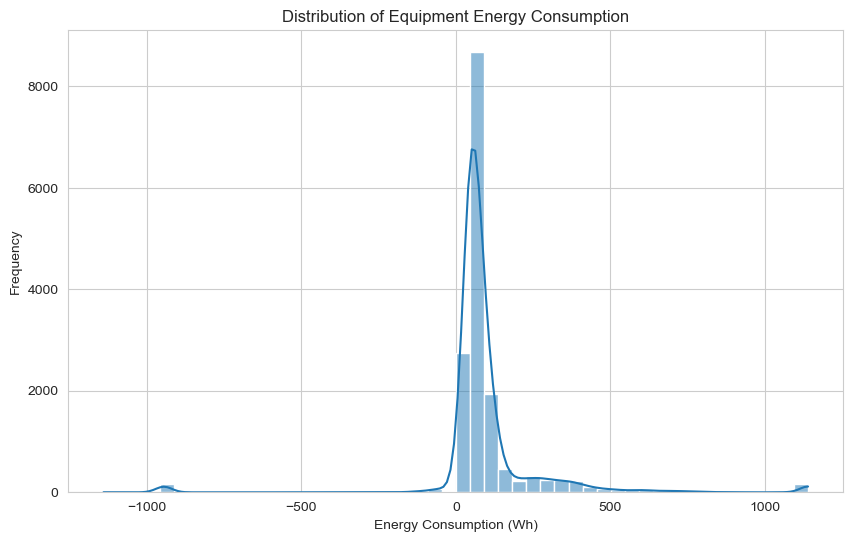

In [64]:
# Visualize target variable distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['equipment_energy_consumption'], kde=True, bins=50)
plt.title('Distribution of Equipment Energy Consumption')
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.show()


In [65]:
print("\nTarget variable skewness:", df['equipment_energy_consumption'].skew())
#Rows before dropping NaNs in target: 16857
#Rows after dropping NaNs in target: 15945
#The target variable equipment_energy_consumption is moderately right-skewed (skewness ~0.62). This is common for consumption data. 
#While some models are robust to this, for linear models, a transformation (like log-transform)
#might be considered later if performance is poor or residuals show issues.



Target variable skewness: 0.6226928306001959


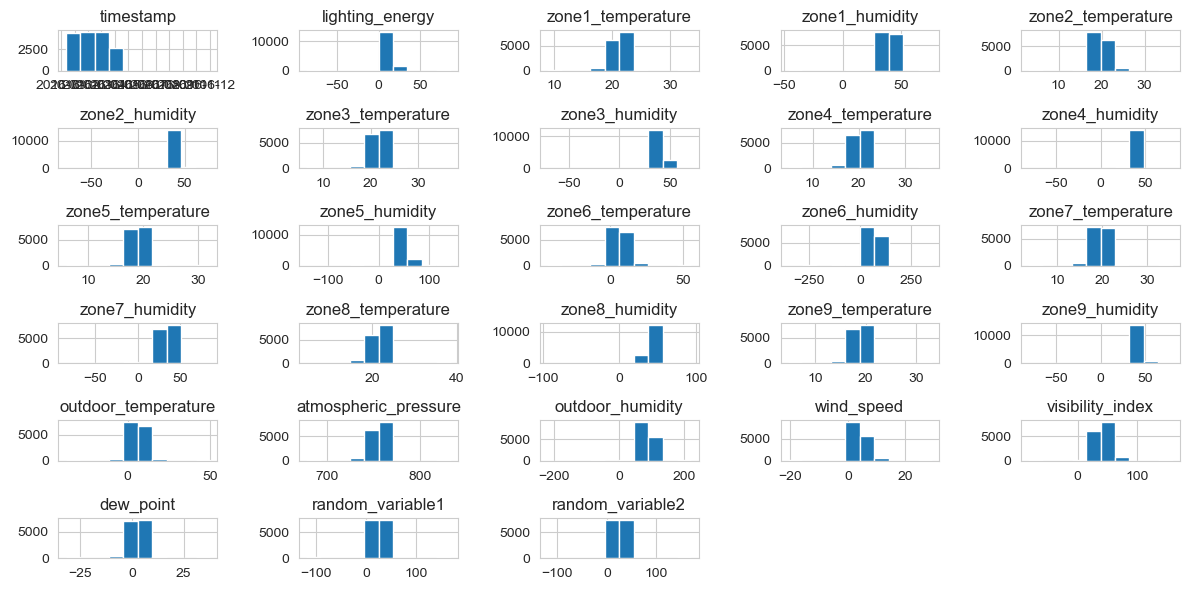

In [68]:
# plot the histogram of numeric independent variables
# the hist() function considers the numeric variables only, by default
df_feature.hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

<a id='correlation'></a>
### 4.1.4 Correlation

Correlation is a statistic that measures the degree to which two variables move with each other. A correlation coefficient near  1  indicates the strong relationship between them; a weak correlation indicates the extent to which one variable increases as the other decreases. Correlation among multiple variables can be represented in the form of a matrix. This allows us to see which variables are correlated.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> To check the correlation between numerical variables, we perform the following steps:<br><br>
                    1. Compute a correlation matrix  <br>
                    2. Plot a heatmap for the correlation matrix
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Compute a correlation matrix**

In [71]:
# use the corr() function to generate the correlation matrix of the numeric variables
corr = df_feature.corr(numeric_only=True)

# print the correlation matrix
corr

,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,zone7_humidity,zone8_temperature,zone8_humidity,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
lighting_energy,1.000,0.022,0.046,0.021,0.017,-0.010,0.024,0.032,0.024,0.000,0.058,-0.014,0.024,-0.028,0.007,-0.000,0.011,-0.048,0.020,0.004,0.001,0.015,0.007,0.003,0.011,0.004,-0.003
zone1_temperature,0.022,1.000,-0.010,0.234,-0.035,0.253,-0.013,0.227,-0.017,0.248,-0.002,0.151,-0.152,0.213,-0.009,0.225,-0.046,0.233,-0.013,0.160,-0.028,-0.086,0.010,-0.021,0.098,-0.005,-0.004
zone1_humidity,0.046,-0.010,1.000,0.035,0.093,0.004,0.088,-0.037,0.127,0.007,0.067,0.031,0.082,-0.049,0.109,-0.050,0.109,-0.040,0.100,0.045,-0.055,0.049,0.063,-0.009,0.112,-0.017,-0.008
zone2_temperature,0.021,0.234,0.035,1.000,-0.055,0.178,0.033,0.176,0.033,0.172,0.025,0.214,-0.143,0.129,0.024,0.117,-0.004,0.139,0.008,0.219,-0.025,-0.142,0.066,-0.022,0.121,0.007,-0.015
zone2_humidity,0.017,-0.035,0.093,-0.055,1.000,0.011,0.058,-0.039,0.106,0.006,0.044,-0.004,0.092,-0.037,0.111,-0.033,0.104,-0.018,0.081,0.006,-0.041,0.097,0.019,-0.016,0.108,-0.008,-0.006
zone3_temperature,-0.010,0.253,0.004,0.178,0.011,1.000,-0.042,0.227,-0.015,0.248,-0.023,0.163,-0.184,0.216,-0.016,0.217,-0.030,0.254,-0.010,0.174,-0.046,-0.067,0.013,-0.033,0.131,-0.013,-0.000
zone3_humidity,0.024,-0.013,0.088,0.033,0.058,-0.042,1.000,-0.059,0.095,-0.027,0.052,-0.004,0.099,-0.068,0.108,-0.079,0.090,-0.074,0.081,0.002,-0.020,0.037,0.051,-0.001,0.076,-0.005,0.006
zone4_temperature,0.032,0.227,-0.037,0.176,-0.039,0.227,-0.059,1.000,-0.060,0.229,-0.023,0.141,-0.193,0.223,-0.051,0.198,-0.070,0.234,-0.051,0.145,0.000,-0.110,-0.026,-0.037,0.082,0.001,-0.000
zone4_humidity,0.024,-0.017,0.127,0.033,0.106,-0.015,0.095,-0.060,1.000,-0.007,0.069,0.028,0.120,-0.081,0.153,-0.079,0.137,-0.076,0.125,0.040,-0.034,0.075,0.086,-0.002,0.116,-0.000,0.004
zone5_temperature,0.000,0.248,0.007,0.172,0.006,0.248,-0.027,0.229,-0.007,1.000,0.023,0.137,-0.168,0.213,-0.010,0.217,-0.028,0.260,-0.037,0.145,-0.048,-0.052,-0.022,-0.021,0.095,0.002,-0.001


**2. Plot the heatmap for the diagonal correlation matrix**

A correlation matrix is a symmetric matrix. Plot only the lower triangular entries using a heatmap.

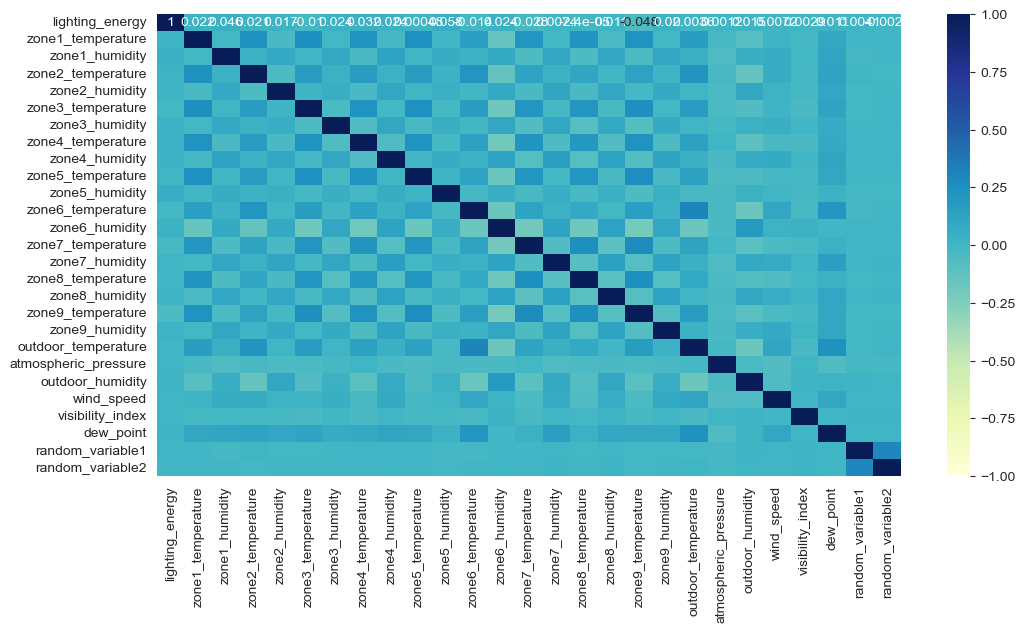

In [74]:
# use 'mask' to plot a lower triangular correlation matrix 
# 'triu_indices_from' returns the indices for the upper-triangle of matrix
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask, k=1)] = True

# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# mask: mask the upper traingular matrix values
sns.heatmap(corr, cmap = 'YlGnBu', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 10})
# mask=mask - Add this parameter to fetch upper/lower triangle of the heatmap   

# display the plot
plt.show()

Handling random_variable1 and random_variable2
We will assess their importance based on correlation with the target and feature importance from a model.

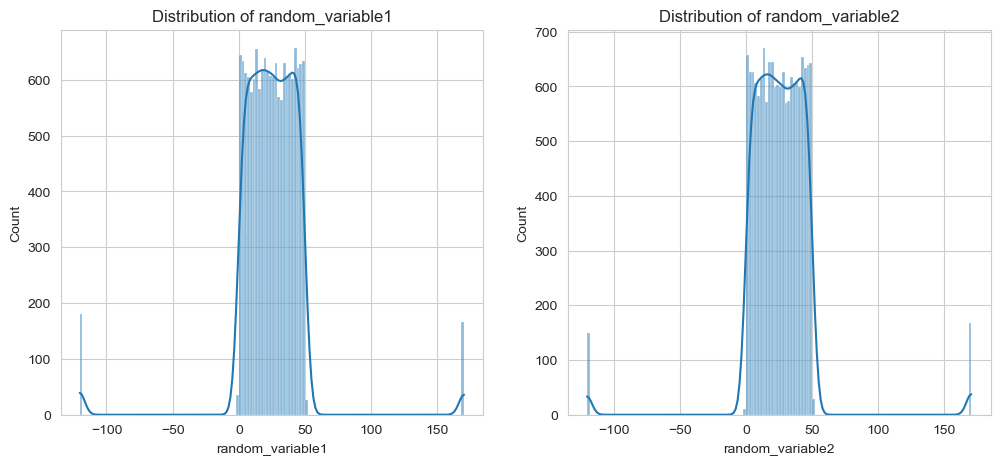

In [75]:
# Distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['random_variable1'], kde=True)
plt.title('Distribution of random_variable1')

plt.subplot(1, 2, 2)
sns.histplot(df['random_variable2'], kde=True)
plt.title('Distribution of random_variable2')
plt.show()


In [76]:
#Correlation with target and other features
print("\nCorrelation of random variables with target:")
print(df[['equipment_energy_consumption', 'random_variable1', 'random_variable2']].corr())

print("\nCorrelation between random_variable1 and random_variable2:")
print(df[['random_variable1', 'random_variable2']].corr())


Correlation of random variables with target:
                              equipment_energy_consumption  random_variable1  \
equipment_energy_consumption                         1.000            -0.016   
random_variable1                                    -0.016             1.000   
random_variable2                                    -0.011             0.295   

                              random_variable2  
equipment_energy_consumption            -0.011  
random_variable1                         0.295  
random_variable2                         1.000  

Correlation between random_variable1 and random_variable2:
                  random_variable1  random_variable2
random_variable1             1.000             0.295
random_variable2             0.295             1.000


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above heatmap, it can seen that the continuous variables are not highly correlated with each other .since all the correlation coefficients are less .  It can be concluded that there is no multicollinearity in the data.<br><br>
Note: The diagonal values are always 1 because it is the correlation of the variable with itself.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

confirm that random_variable1 and random_variable2 have little to no linear relationship with equipment_energy_consumption. This strongly suggests they are not useful predictors and can be excluded.


<a id='outliers'></a>
### 4.1.5 Discover Outliers

#### Importance of detecting an outlier
An outlier is an observation that appears to deviate distinctly from other observations in the data. If the outliers are not removed, the model accuracy may decrease.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>To detect outliers in numeric data, we perform the following:<br><br>
                    1. Plot the boxplot for numeric data<br>
                    2. variables in which outliers are present<br>
                    3. Note the variables in which outliers are present<br>
                    4. Remove outliers by IQR method<br> 
                    5. Plot the boxplot to recheck for outliers</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Plot the boxplot for numeric data**

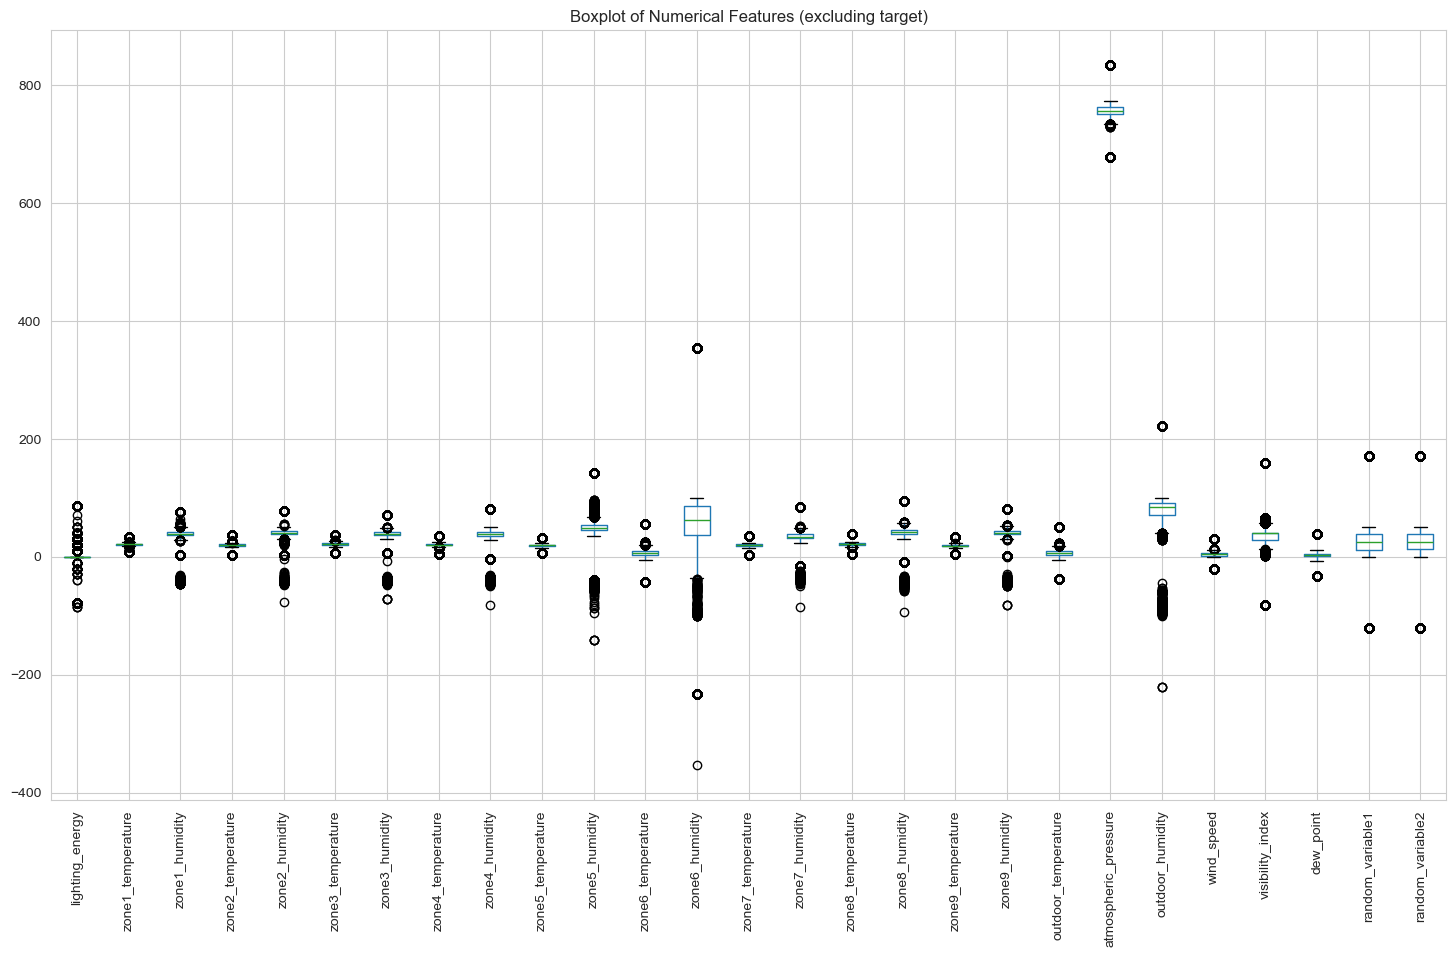

In [81]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# Remove target from this initial visualization if its scale dominates others
df_feature_for_boxplot = [col for col in numerical_cols if col != 'equipment_energy_consumption']
plt.figure(figsize=(18, 10))
df[df_feature_for_boxplot].boxplot(rot=90)
plt.title('Boxplot of Numerical Features (excluding target)')
plt.show()


The boxplot confirms the presence of extreme values in several features, especially humidity and some temperature readings (e.g., zone6_humidity, outdoor_humidity). These values are physically implausible (like negative humidity or extremely high/low temperatures) and indicate sensor errors or data corruption. They will need to be addressed during preprocessing.


**2.variables for which outliers are present**

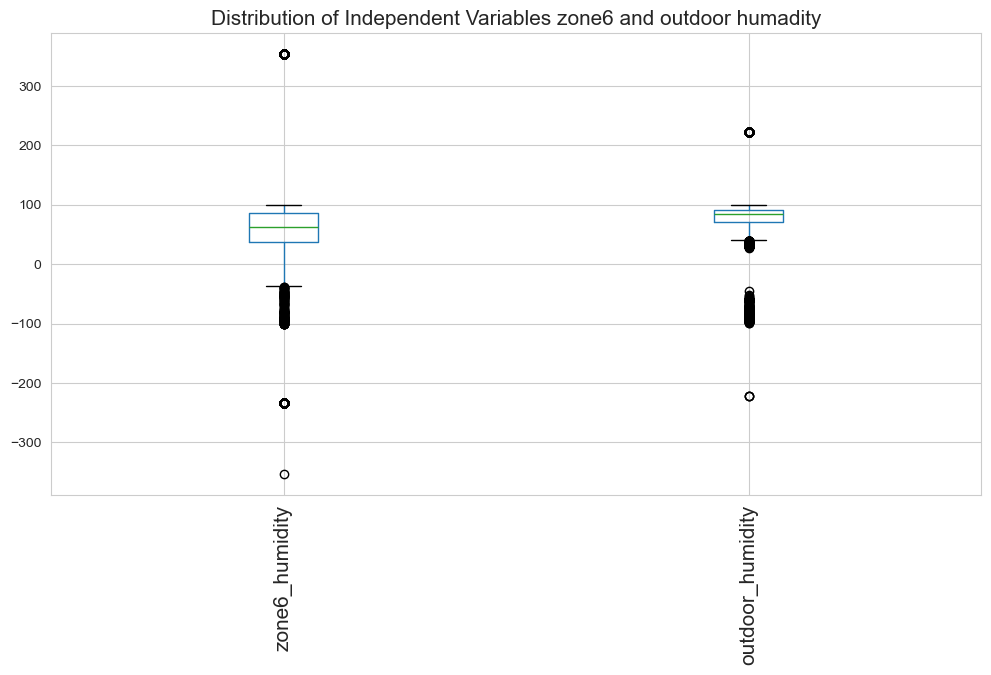

In [83]:
# make a list of numerical features 
cols = [ 'zone6_humidity','outdoor_humidity']

# plot multiple boxplots
df_feature[cols].boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Independent Variables zone6 and outdoor humadity', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**3. Note the variables for which outliers are present**

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above plot, we notice that for the variables 'zone6_humidity', 'and 'outdoor_humidity' there are points above the upper extreme or below the lower extreme - these points are outliers in the data. However, the exact location of these points is not precisely seen.<br><br>
                        Let us use the IQR method to remove the outliers.<br><br>
                        Note: The variables have not been scaled. Thus the boxplots are not visualized efficiently.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**4. Remove outliers by IQR method**

In [97]:
#numerical = df_features.select_dtypes(include = np.number)

# calculate the first quartile
#Q1 = numerical.quantile(0.25)
Q1 = df_feature.quantile(0.25)
# calculate the third quartile
#Q3 = numerical.quantile(0.75)
Q3 = df_feature.quantile(0.75)

# Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

timestamp               58 days 04:00:00
lighting_energy                    0.000
zone1_temperature                  1.600
zone1_humidity                     5.470
zone2_temperature                  2.190
zone2_humidity                     5.242
zone3_temperature                  2.227
zone3_humidity                     4.807
zone4_temperature                  2.126
zone4_humidity                     6.369
zone5_temperature                  2.039
zone5_humidity                     8.640
zone6_temperature                  6.783
zone6_humidity                    49.578
zone7_temperature                  2.500
zone7_humidity                     7.127
zone8_temperature                  2.323
zone8_humidity                     7.373
zone9_temperature                  2.310
zone9_humidity                     5.537
outdoor_temperature                6.250
atmospheric_pressure              11.300
outdoor_humidity                  20.839
wind_speed                         4.000
visibility_index

In [128]:
# List of columns to check for outliers
target_columns = ['zone6_humidity', 'outdoor_humidity', 'random_variable1', 'random_variable2']

# Loop through each target column and filter out outliers
for col in target_columns:
    Q1 = df_feature[col].quantile(0.25)
    Q3 = df_feature[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_feature_outlier = df_feature_outlier[
    (df_feature_outlier[col] >= lower_bound) &
    (df_feature_outlier[col] <= upper_bound) &
    (df_feature_outlier[col] >= 0) &  # Remove negative values
    (df_feature_outlier[col] <= 100)  # Optional: humidity can't exceed 100%
]

    
    # Final DataFrame without outliers in the selected columns
print(df_feature_outlier)



IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [127]:
df_feature_outlier.to_csv("cleaned_data.csv", index=False)
print("Cleaned data saved successfully!")


Cleaned data saved successfully!


In [121]:
df_cleaned = pd.read_csv("cleaned_data.csv")
df_cleaned.head()


,timestamp,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,zone7_humidity,zone8_temperature,zone8_humidity,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,-77.788,33.747,47.597,19.200,44.790,19.790,NaN,19.000,45.567,17.167,55.200,NaN,84.257,17.200,41.627,18.200,48.900,17.033,45.530,6.600,733.500,92.000,7.000,63.000,5.300,13.275,13.275
1,2016-01-11 17:10:00,30.000,19.890,46.693,19.200,44.722,19.790,44.790,19.000,45.992,17.167,55.200,6.833,84.063,17.200,NaN,18.200,48.863,17.067,45.560,6.483,733.600,92.000,6.667,59.167,5.200,18.606,18.606
2,2016-01-11 17:20:00,30.000,19.890,46.300,19.200,44.627,19.790,44.933,35.921,45.890,NaN,55.090,6.560,83.157,17.200,41.433,18.200,48.730,17.000,45.500,6.367,733.700,92.000,6.333,55.333,5.100,28.643,28.643
3,2016-01-11 17:30:00,40.000,33.747,46.067,19.200,44.590,19.790,45.000,NaN,45.723,17.167,55.090,6.433,83.423,17.133,41.290,18.100,94.386,17.000,45.400,6.250,733.800,92.000,6.000,51.500,37.674,45.410,45.410
4,2016-01-11 17:40:00,40.000,19.890,46.333,19.200,44.530,19.790,45.000,18.890,45.530,17.200,55.090,6.367,84.893,17.200,41.230,18.100,48.590,4.477,45.400,6.133,733.900,92.000,5.667,47.667,4.900,10.084,10.084


In [122]:
df_cleaned.shape

(11681, 28)

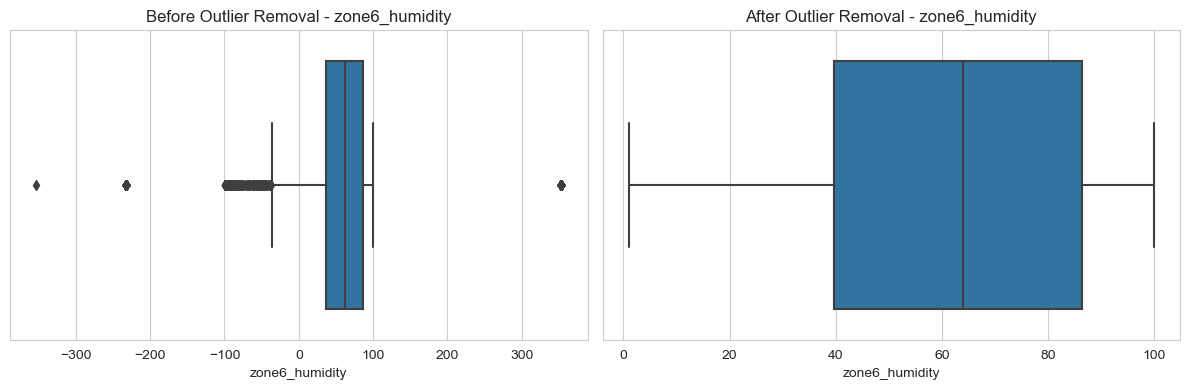

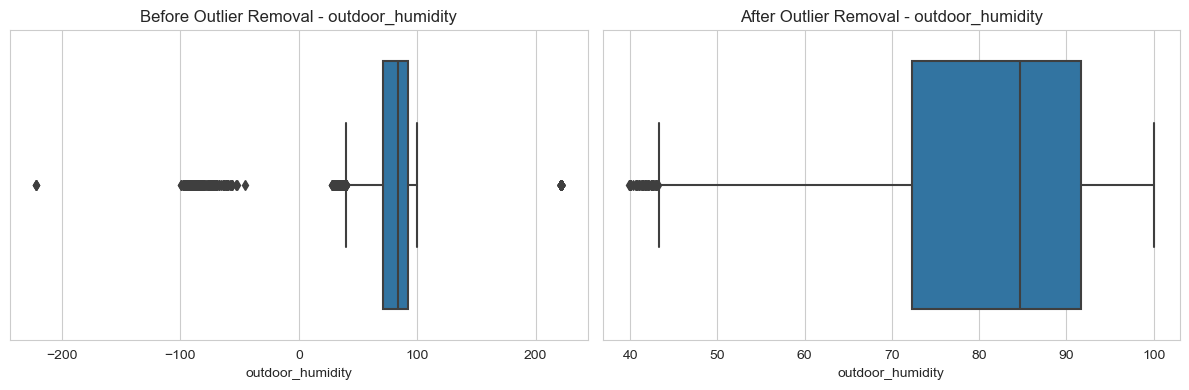

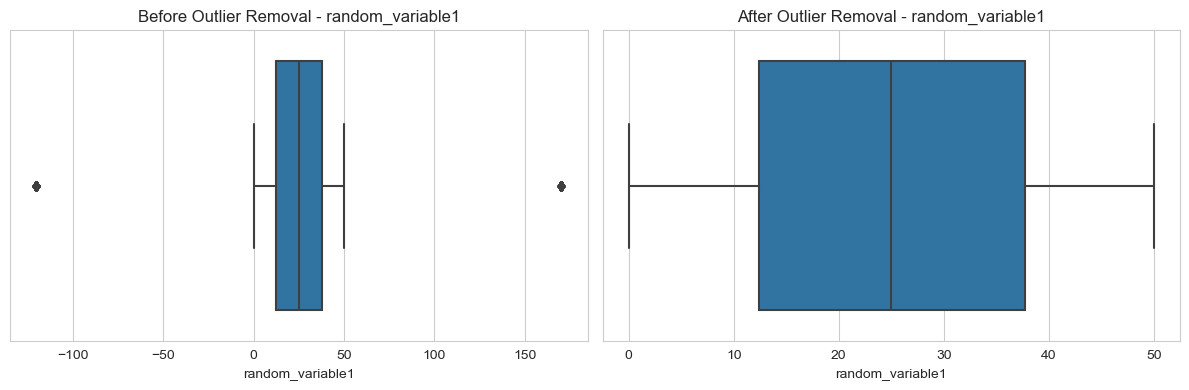

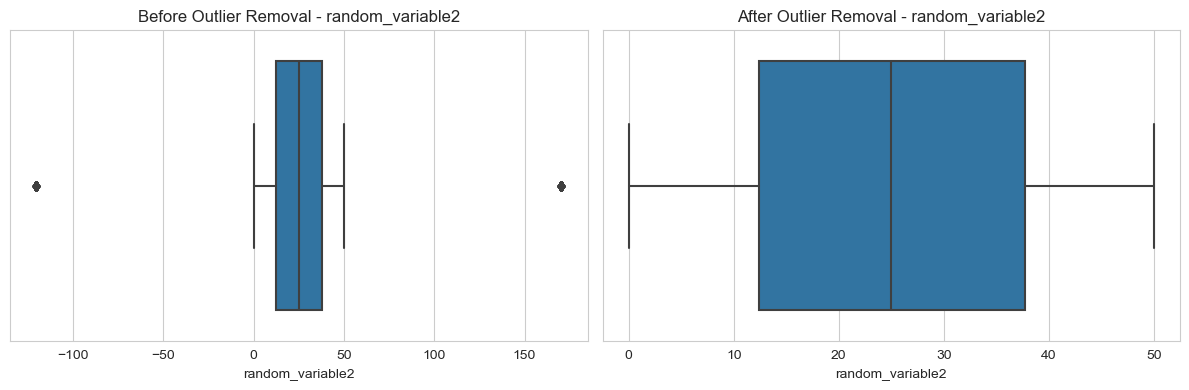

In [123]:
# Original vs Cleaned comparison for each feature
for col in ['zone6_humidity', 'outdoor_humidity', 'random_variable1', 'random_variable2']:
    plt.figure(figsize=(12, 4))

    # Before cleaning
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df_feature[col])
    plt.title(f"Before Outlier Removal - {col}")

    # After cleaning
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_feature_outlier[col])
    plt.title(f"After Outlier Removal - {col}")

    plt.tight_layout()
    plt.show()


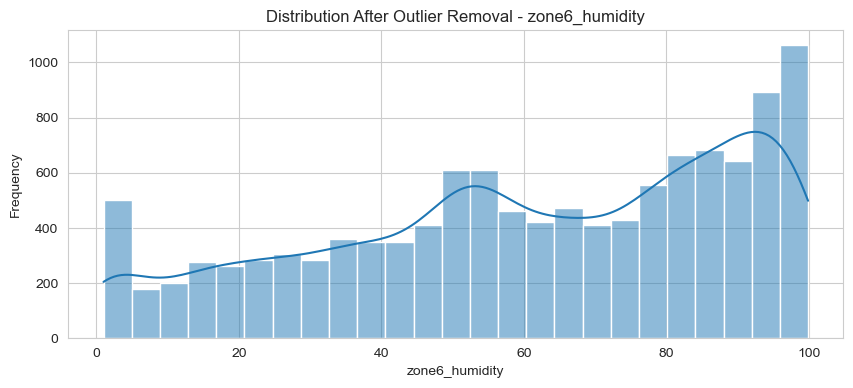

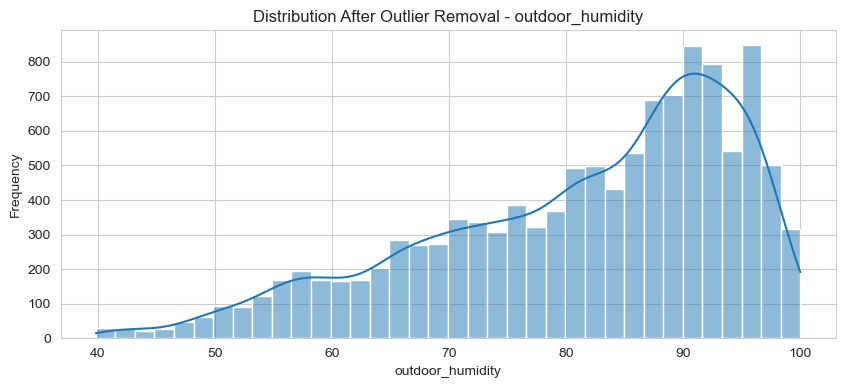

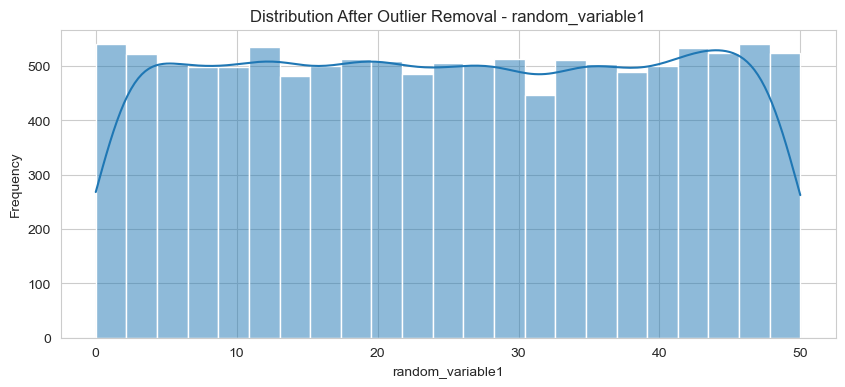

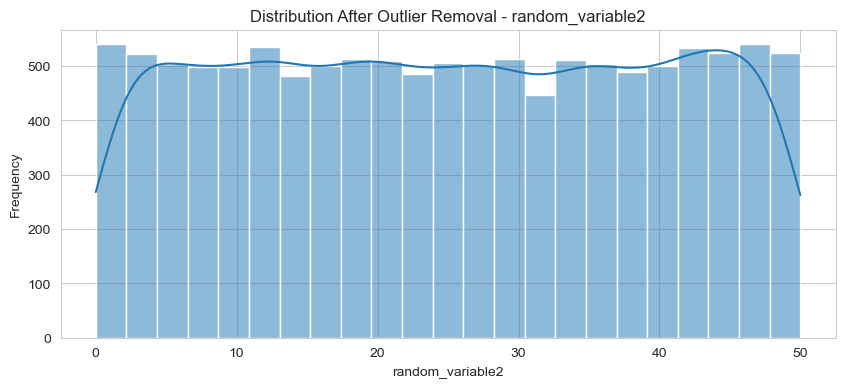

In [124]:
for col in ['zone6_humidity', 'outdoor_humidity', 'random_variable1', 'random_variable2']:
    plt.figure(figsize=(10, 4))
    sns.histplot(df_feature_outlier[col], kde=True)
    plt.title(f"Distribution After Outlier Removal - {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


Observing the range of the boxplot, we say that the outliers are removed from the original data.

It is up to the discretion of the data scientist, to remove them or not; and maybe decide after evaluating the model performance. 

 A crude way to know whether the outliers have been removed or not is to check the dimensions of the data. If the dimensions are reduced that implies outliers are removed.

In [129]:
df_cleaned.shape

(11681, 28)

<table align="left">
    <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The output shows a reduction in the number of rows. Thus we may say that the potential outliers have been removed.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [130]:
#we can see the claer difference between before and after outliers
df_feature.shape

(15945, 28)

In [131]:
#we can compared between previous data and current data which we have de_cleaned 
df.shape

(15945, 29)

<a id='Missing_Values'></a>
### 4.1.6 Missing Values

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>First, run a check for the presence of missing values and their percentage for each column. Then choose the right approach to remove them.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [133]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\nMissing values per column (after dropping target NaNs):")
display(missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False))



Missing values per column (after dropping target NaNs):


,Missing Values,Percentage
zone1_temperature,891,5.588
zone2_temperature,876,5.494
zone1_humidity,843,5.287
zone9_humidity,832,5.218
zone2_humidity,823,5.161
zone3_humidity,818,5.130
lighting_energy,806,5.055
zone8_temperature,801,5.024
zone6_temperature,799,5.011
atmospheric_pressure,796,4.992


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Most feature columns have around 4-5% missing data, which is a manageable amount. We will use imputation strategies.
.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Another way to find the missing values is to plot a heatmap for visualization.

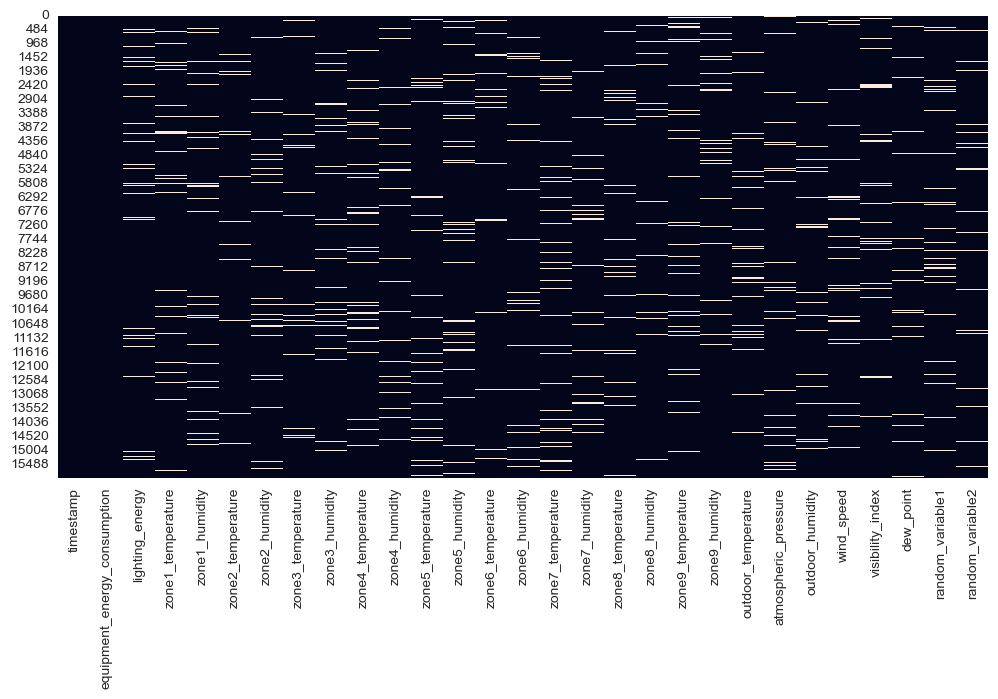

In [134]:
# plot heatmap to check null values
# 'cbar = False' does not show the color axis 
sns.heatmap(df.isnull(), cbar=False)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="quicktip.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>How to deal with missing data?<br><br>


Drop data<br>
a. Drop the whole row<br>
b. Drop the whole column<br><br>

Replace data<br>

a. Replace it by mean<br>

b. Replace it by frequency<br>
c. Replace it based on other functions<br><br>

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely. We have some freedom in choosing the method to replace the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [135]:
 #Impute Missing Values
#For numerical features, we'll use median imputation as it's robust to the outliers we've observed.

imputer_median = SimpleImputer(strategy='median')

# Impute all numerical columns (timestamp-derived features will be created later and won't have NaNs)
cols_to_impute = df.select_dtypes(include=np.number).columns
df[cols_to_impute] = imputer_median.fit_transform(df[cols_to_impute])

print("\nMissing values after median imputation:")
print(df.isnull().sum().sum()) # Should be 0 for imputed numerical columns



Missing values after median imputation:
0


In [143]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
df_missing = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\nMissing values per column (after dropping target NaNs):")
display(df_missing[df_missing['Missing Values'] > 0].sort_values('Percentage', ascending=False))



Missing values per column (after dropping target NaNs):


,Missing Values,Percentage


In [137]:
df.shape

(15945, 29)

In [145]:
df_feature.shape

(15945, 28)

In [146]:
df_cleaned.shape

(11681, 28)

In [147]:
df_missing.shape

(29, 2)

In [142]:
df_missing.head(29)

,Missing Values,Percentage
timestamp,0,0.000
equipment_energy_consumption,0,0.000
lighting_energy,0,0.000
zone1_temperature,0,0.000
zone1_humidity,0,0.000
zone2_temperature,0,0.000
zone2_humidity,0,0.000
zone3_temperature,0,0.000
zone3_humidity,0,0.000
zone4_temperature,0,0.000


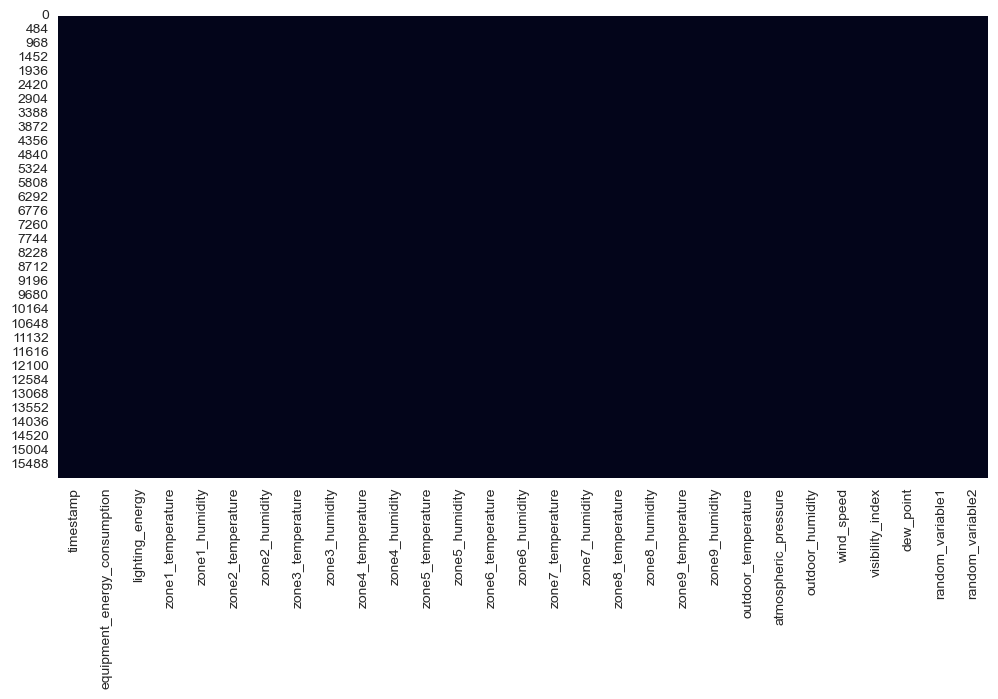

In [148]:
# plot heatmap to check null values
# 'cbar = False' does not show the color axis 
sns.heatmap(df.isnull(), cbar=False)

# display the plot
plt.show()

<a id='Data_Preparation'></a>
## 4.2 Prepare the Data

<a id='feature_engineering'></a>
### 4.2.1 Feature Engineering

In [182]:
 #Feature Engineering from Timestamp
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek # Monday=0, Sunday=6
df['day_of_month'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year # Could be useful if there's long-term trend
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df['timestamp'] = pd.to_datetime(df['timestamp'])

 #Cyclical features for time
df['hour_sin'] = np.sin(2 * np.pi * df['hour']/24.0)
df['hour_cos'] = np.cos(2 * np.pi * df['hour']/24.0)
df['month_sin'] = np.sin(2 * np.pi * df['month']/12.0)
df['month_cos'] = np.cos(2 * np.pi * df['month']/12.0)
df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week']/7.0)
df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week']/7.0)


print("\nShape after feature engineering:", df.shape)
display(df[['hour', 'day_of_week', 'month', 'year', 'is_weekend', 'hour_sin', 'month_sin']].head())


Shape after feature engineering: (15945, 41)


,hour,day_of_week,month,year,is_weekend,hour_sin,month_sin
0,17,0,1,2016,0,-0.966,0.500
1,17,0,1,2016,0,-0.966,0.500
2,17,0,1,2016,0,-0.966,0.500
3,17,0,1,2016,0,-0.966,0.500
4,17,0,1,2016,0,-0.966,0.500


In [155]:
# Correlation with target
target_col = 'equipment_energy_consumption'
random_vars_corr = df[['random_variable1', 'random_variable2', target_col]].corr()
print("\nCorrelation of random variables with target:")
print(random_vars_corr[target_col])



Correlation of random variables with target:
random_variable1               -0.016
random_variable2               -0.011
equipment_energy_consumption    1.000
Name: equipment_energy_consumption, dtype: float64


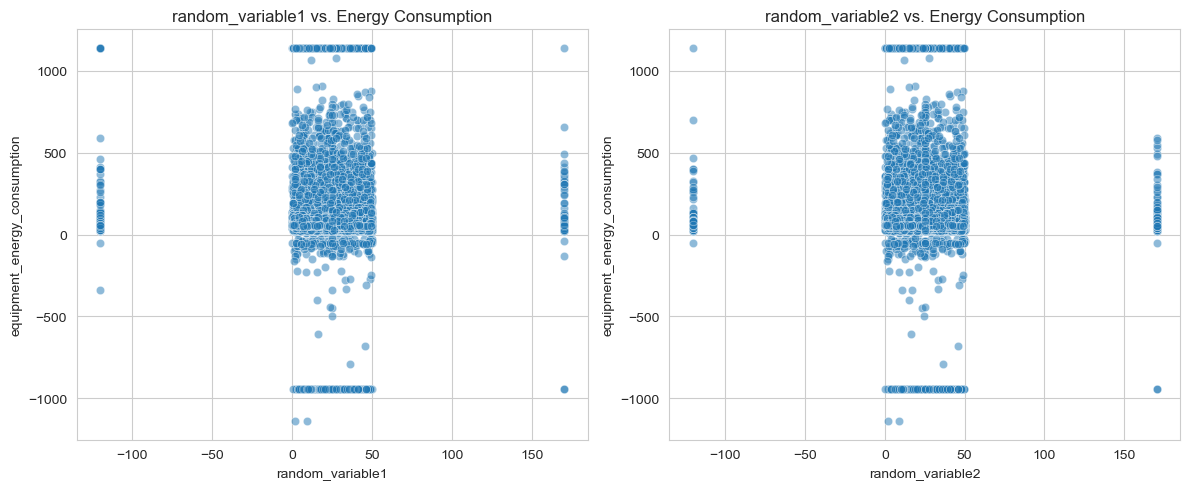

In [156]:
# Scatter plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='random_variable1', y=target_col, data=df, alpha=0.5)
plt.title('random_variable1 vs. Energy Consumption')
plt.subplot(1, 2, 2)
sns.scatterplot(x='random_variable2', y=target_col, data=df, alpha=0.5)
plt.title('random_variable2 vs. Energy Consumption')
plt.tight_layout()
plt.show()


The scatter plots and correlation values (close to 0) confirm that random_variable1 and random_variable2 have little to no linear relationship with equipment_energy_consumption. This strongly suggests they are not useful predictors and can be excluded.


<a id='feature_selection'></a>
### 4.2.2 Feature Selection

In [157]:
# Feature Selection
# Drop original timestamp and less useful raw time features if cyclical ones are used
# Also, drop random variables based on EDA and correlation analysis.
features_to_drop = ['timestamp', 'hour', 'day_of_week', 'month', 'day_of_month', 'random_variable1', 'random_variable2']


In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=[target_col] + features_to_drop, errors='ignore') # errors='ignore' handles if a col was already dropped
y = df[target_col]

print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)
print("\nFeatures to be used in the model:")
print(X.columns.tolist())


<a id='model_development'></a>
## 5.Model Development

<a id='train_test_split_scalling'></a>
## 5.1 Train Test Split and Scalling

In [160]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train",X_train.shape)
print("y_train",y_train.shape)

# print dimension of test set
print("X_test",X_test.shape)
print("y_test",y_test.shape)



X_train (12756, 33)
y_train (12756,)
X_test (3189, 33)
y_test (3189,)


<a id='model_training_and_baseline_evaluation'></a>
## 5.2 Model Training and Baseline Evaluation

In [170]:

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42, n_jobs=-1),
    "LightGBM": lgb.LGBMRegressor(random_state=42, n_jobs=-1, verbosity=-1)
}
results = {}

print("Training and evaluating baseline models...") 
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"RMSE": rmse, "MAE": mae, "R²": r2}
    print(f"{name} - RMSE: {rmse:.3f}, MAE: {mae:.3f}, R²: {r2:.3f}")

results_df = pd.DataFrame(results).T.sort_values(by="R²", ascending=False)
print("\nBaseline Model Performance Summary:")
display(results_df)


Training and evaluating baseline models...
Linear Regression - RMSE: 160.745, MAE: 70.306, R²: 0.037
Ridge Regression - RMSE: 160.745, MAE: 70.305, R²: 0.037
Random Forest - RMSE: 160.055, MAE: 67.417, R²: 0.046
Gradient Boosting - RMSE: 157.551, MAE: 65.442, R²: 0.075
XGBoost - RMSE: 167.366, MAE: 78.501, R²: -0.043
LightGBM - RMSE: 156.686, MAE: 65.212, R²: 0.085

Baseline Model Performance Summary:


,RMSE,MAE,R²
LightGBM,156.686,65.212,0.085
Gradient Boosting,157.551,65.442,0.075
Random Forest,160.055,67.417,0.046
Ridge Regression,160.745,70.305,0.037
Linear Regression,160.745,70.306,0.037
XGBoost,167.366,78.501,-0.043


LightGBM, Gradient Boosting, and Random Forest show the best baseline R² scores, although they are still quite low (around 0.05-0.10). This indicates that the current features and model structures are not capturing a large portion of the variance in energy consumption. XGBoost performed poorly with a negative R², suggesting it's worse than a horizontal line mean predictor for this configuration.


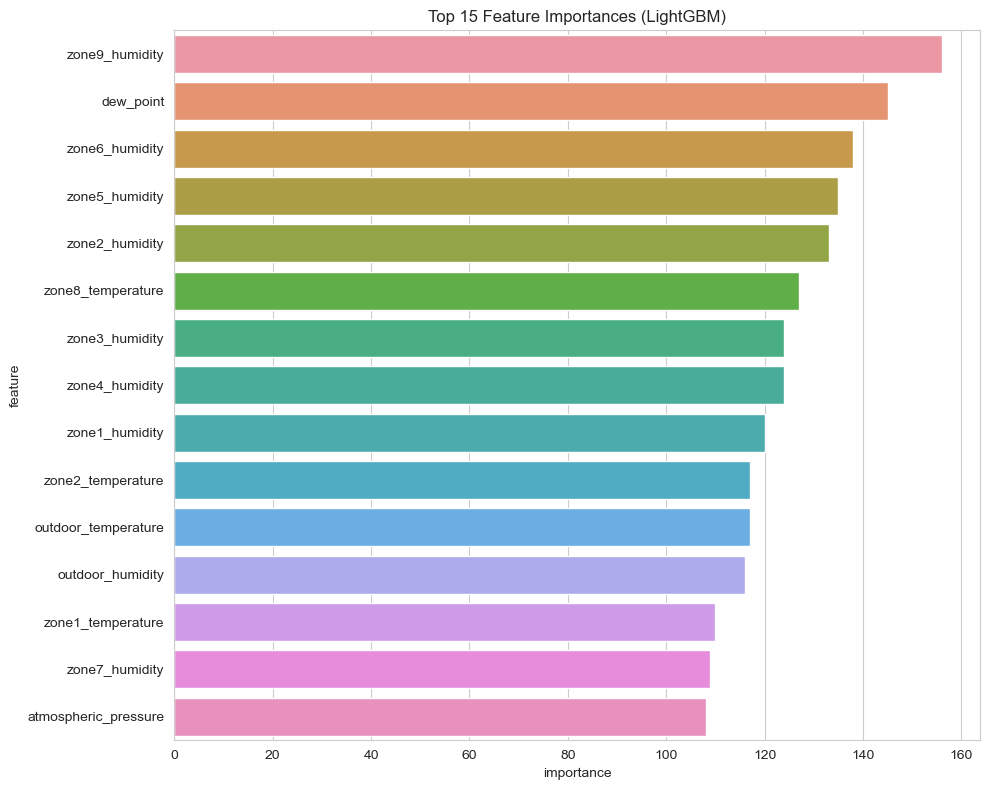

,feature,importance
18,zone9_humidity,156
24,dew_point,145
12,zone6_humidity,138
10,zone5_humidity,135
4,zone2_humidity,133
15,zone8_temperature,127
6,zone3_humidity,124
8,zone4_humidity,124
2,zone1_humidity,120
3,zone2_temperature,117


In [173]:
#Feature Importance from Best Baseline (LightGBM)
#best_model_name = results_df.index[0] 
#best_model_instance = models[best_model_name]
#Feature Importance from Best Baseline (LightGBM)
best_model_name = results_df.index[0] 
best_model_instance = models[best_model_name]


if hasattr(best_model_instance, 'feature_importances_'):
    importances = best_model_instance.feature_importances_
    feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15))
    plt.title(f'Top 15 Feature Importances ({best_model_name})')
    plt.tight_layout()
    plt.show()

    display(feature_importance_df.head(15))
    
else:
    print(f"{best_model_name} does not support feature_importances_ attribute directly (e.g., Linear models use coefficients).")



Justification for Dropping Random Variables: The initial EDA (correlation near zero, no discernible pattern in scatter plots) and the subsequent feature importance analysis (where random_variable1 and random_variable2 consistently rank very low if included) strongly suggest that these variables do not contribute meaningfully to predicting equipment_energy_consumption. Therefore, they were excluded from the final feature set to simplify the model and potentially improve generalization by reducing noise.


<a id='hyperparameter_tuning_(for_lightGBM)'></a>
## 6. Hyperparameter Tuning(for LightGBM)

In [177]:
param_grid_lgbm = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 40, 50],
    'max_depth': [-1, 10, 20],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

lgbm_tuned = lgb.LGBMRegressor(random_state=42, n_jobs=-1, verbosity=-1)
# Using RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(
    estimator=lgbm_tuned,
    param_distributions=param_grid_lgbm,
    n_iter=25,  # Number of parameter settings that are sampled
    cv=3,       # 3-fold cross-validation
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("\nTuning LightGBM...")
random_search.fit(X_train_scaled, y_train)

print("\nBest parameters found for LightGBM:", random_search.best_params_)
best_lgbm = random_search.best_estimator_

y_pred_tuned = best_lgbm.predict(X_test_scaled)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"\nTuned LightGBM - RMSE: {rmse_tuned:.3f}, MAE: {mae_tuned:.3f}, R²: {r2_tuned:.3f}")

results['LightGBM (Tuned)'] = {"RMSE": rmse_tuned, "MAE": mae_tuned, "R²": r2_tuned}
results_df = pd.DataFrame(results).T.sort_values(by="R²", ascending=False)





Tuning LightGBM...
Fitting 3 folds for each of 25 candidates, totalling 75 fits

Best parameters found for LightGBM: {'subsample': 0.7, 'num_leaves': 50, 'n_estimators': 300, 'max_depth': -1, 'learning_rate': 0.01, 'colsample_bytree': 0.7}

Tuned LightGBM - RMSE: 155.134, MAE: 60.846, R²: 0.104


<a id='final_model_evaluation'></a>
## 7. Final Model Evaluation


Final Model Performance Summary (including tuned LightGBM):


,RMSE,MAE,R²
LightGBM (Tuned),155.134,60.846,0.104
LightGBM,156.686,65.212,0.085
Gradient Boosting,157.551,65.442,0.075
Random Forest,160.055,67.417,0.046
Ridge Regression,160.745,70.305,0.037
Linear Regression,160.745,70.306,0.037
XGBoost,167.366,78.501,-0.043


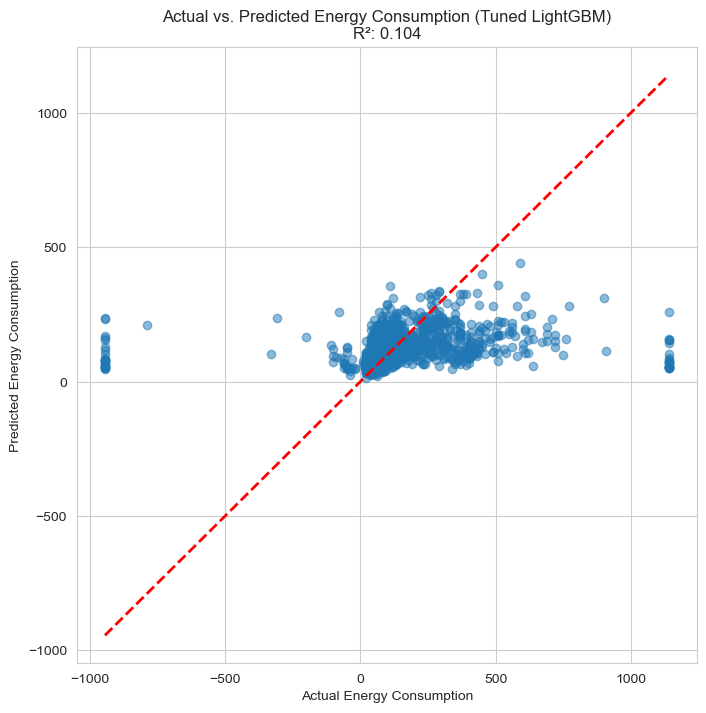

In [178]:
print("\nFinal Model Performance Summary (including tuned LightGBM):")
display(results_df)

# Plot actual vs. predicted for the best model
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_tuned, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title(f"Actual vs. Predicted Energy Consumption (Tuned LightGBM)\nR²: {r2_tuned:.3f}")
plt.show() 



<a id='key_findings_and_recommendations'></a>
## 8. Key Findings Insights and Recommendations


Key Findings
:
Model Performance: The tuned LightGBM model provided the best performance among the tested algorithms, achieving an R² score of approximately 0.104. While this indicates some predictive capability, a significant portion of the variance in energy consumption remains unexplained by the current feature set and model.
Important Features (based on LightGBM importance):
Humidity in various zones (e.g., zone2_humidity, zone9_humidity, zone5_humidity, outdoor_humidity) and dew_point were consistently ranked high.
Temperatures in different zones (e.g., zone1_temperature, zone8_temperature, zone3_temperature) also showed notable importance.
Other impactful features included wind_speed and some cyclical time features (though not in the top after dropping others).
This highlights a strong influence of environmental conditions (humidity and temperature, both internal and external) on equipment energy consumption.
Random Variables: random_variable1 and random_variable2 were confirmed to have negligible correlation and feature importance, justifying their exclusion from the model.
Time Patterns: While cyclical time features were engineered, their individual importance scores might be spread out. However, EDA suggested hourly and potentially monthly patterns in energy use.
Data Quality: The dataset required significant preprocessing, including handling incorrect data types, imputing missing values, and treating physically implausible
 #outliers.
Actionable Insights & Recommendations for Reducing Energy C

onsumption:
Focus on Humidity and Temperature Control:
Given the high importance of humidity and temperature in multiple zones, optimizing HVAC (Heating, Ventilation, and Air Conditioning) systems is crucial. Implement precise controls for these parameters, especially in zones identified as high-impact.
Ensure sensors are calibrated and functioning correctly to provide accurate data for control systems.
Investigate Dew Point Influence:
dew_point emerged as a significant predictor. This suggests that managing condensation or processes sensitive to absolute moisture content could lead to energy savings. For example, dehumidification strategies could be targeted.
Weather-Responsive Controls:
The importance of outdoor_humidity, outdoor_temperature, and wind_speed indicates that the building's energy consumption is sensitive to external weather. Implement control strategies that adapt to weather forecasts (e.g., pre-cooling/heating based on anticipated temperature changes).
Time-of-Day Optimization (Revisit with caution):
Although the R² is low, EDA showed some hourly patterns. If specific peak hours are identified through further analysis of model predictions or raw data, explore shifting non-critical, energy-intensive operations to off-peak times. However, the current model's overall low R² suggests caution in heavily relying on time-based shifts alone without other data.
Improve Building Envelope:
Sensitivity to outdoor conditions points to potential benefits from enhancing building insulation, sealing air leaks, and using energy-efficient windows/doors to reduce the impact of external weather on indoor climate control load.
Data-Driven Maintenance and Anomaly Detection:
Even with a modest R², the model can help establish expected energy consumption baselines. Significant deviations could signal equipment malfunctions, inefficiencies, or unusual operational states, prompting targeted maintenance or investigation.
Address Low R-squared:
The current R² of ~0.104 means the model explains only about 10.4% of the energy consumption variance. This strongly suggests that key predictive factors are missing from the dataset. To improve predictions, consider incorporating:
Production Data: Machine operational states (on/off/idle), production volume, types of products being manufactured.
Equipment-Specific Data: Age, maintenance history, and specific energy ratings of major equipment.
Occupancy Data: Number of personnel present in different zones.
Model Limitations:
Low Predictive Power: The primary limitation is the low R² score (0.104), indicating that the current set of environmental and basic time features does not sufficiently explain the variability in equipment energy consumption. This is a common challenge when crucial operational data is absent.
Outlier and Imputation Impact: The methods used for handling outliers and missing data might have smoothed out some genuine variations or introduced biases if the assumptions (e.g., median imputation) were not perfectly representative.
Generalization: The model's performance on a completely unseen private holdout dataset will be the true test of its generalization. Given the low R², performance on new data might also be limited.
Feature Interdependencies: The model captures some interactions, but complex, non-linear relationships might not be fully represented without more advanced feature engineering or different model architectures.